### Decision Tree Visualization 

#### Note: This Visualization Notebook is for learning and understanding decision trees and multiclassifiction. Although this will not be graded, we encourage you to use the notebook to learn more about the assignment. The sklearn (scikit-learn) library is used on this notebook, and will not be allowed to be used on the assignment. Do not call or use this library in your assignment submission file.

Some students have had trouble finding a 0.17 version of graphviz for this assignment. Since the course suggests conda, the best source for a library is from https://anaconda.org. Enter this command from your ai_env Terminal, ***conda install -c conda-forge python-graphviz*** which installs version 0.19 (compatible)

In [66]:
# Install important libraries͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from submission import load_csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# Compute features and classes for the dataset for which you want to visualize͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# Just uncomment the lines for the dataset you want to visualize as a Decision Tree.͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀

## For visualizing hand_binary.csv͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀ 
features,classes = load_csv('./data/hand_binary.csv',-1)
feat_names = ['Col0','Col1', 'Col2', 'Col3']
class_names = ['0', '1']

## For visualizing hand_multi.csv a hand build multiclass tree͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀ 
# features,classes = load_csv('./data/hand_multi.csv',-1)͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# feat_names = ['Col0','Col1', 'Col2', 'Col3']͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# class_names = ['0', '1', '2']͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀

## For visualizing simple_binary.csv͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀ 
# features,classes = load_csv('./data/simple_binary.csv',-1)͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# feat_names = ['Col0', 'Col1', 'Col2', 'Col3', 'Col4']͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# class_names = ['0', '1']͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀

## For visualizing simple_multi.csv͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀ 
# features,classes = load_csv('./data/simple_multi.csv',-1)͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# feat_names = ['Col0', 'Col1', 'Col2', 'Col3', 'Col4', 'Col5']͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# class_names = ['0', '1', '2']͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀

## For visualizing mod_complex_binary.csv͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀ 
# features,classes = load_csv('./data/mod_complex_binary.csv',-1)͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# feat_names = ['Col0', 'Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6']͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# class_names = ['0', '1']͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀

## For visualizing mod_complex_multi.csv͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀ 
# features,classes = load_csv('./data/mod_complex_multi.csv',-1)͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# feat_names = ['Col0', 'Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9']͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# class_names = ['0', '1', '2', '3', '4']͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀

## For visualizing mod_complex_binary.csv͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# features,classes = load_csv('./data/complex_binary.csv',-1)͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# feat_names = ['Col0', 'Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9']͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# class_names = ['0', '1']͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀

## For visualizing mod_complex_multi.csv͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# features,classes = load_csv('./data/complex_multi.csv',-1)͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# feat_names = ['Col0', 'Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
#                 'Col10', 'Col11', 'Col12', 'Col13', 'Col14', 'Col15']]͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8']͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀

## For visualizing part23_data.csv͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# features,classes = load_csv('part23_data.csv',-1)͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# labels = ['A1','A2','A3','A4']͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀

## For visualizing vectorize.csv dataset͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# features,classes = load_csv('vectorize.csv',0)͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# labels = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12']͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀

## For visualizing challenge.csv dataset͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# features,classes = load_csv('challenge_train.csv',0)͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
# labels = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16','A17','A18','A19'͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
#         ,'A20','A21','A22','A23','A24','A25','A26','A27','A28','A29','A30']͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀

In [92]:
# # Call sklearn decision tree classifier and fit the decision tree on the dataset.͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
data = {
    'X': ['x01', 'x02', 'x03', 'x04', 'x05', 'x06', 'x07', 'x08', 'x09', 'x10', 'x11', 'x12'],
    'A0': [1.1125, 0.0852, -1.1357, 0.9767, 0.8904, 2.3822, 0.7194, -2.9350, 2.4343, 0.8096, 0.8577, 0.0568],
    'A1': [-0.0274, 1.2190, 0.5843, 0.8422, -1.7606, -0.3122, -0.4061, 0.7810, -1.5380, -0.2601, -0.2217, 0.0696],
    'A2': [-0.0234, -0.7848, -0.3195, 0.2276, 0.3619, -2.0307, -0.7045, -2.5421, -2.7953, 0.5556, -0.6973, 1.1153],
    'A3': [1.3081, -0.7603, 0.8563, 0.1197, -0.8276, -0.5065, -0.0731, 3.0142, 0.3862, 0.6288, -0.1095, -1.1753],
    'y': [1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 0]
}

# Create a DataFrame
# df = pd.DataFrame(data)

# # Features (X) and labels (y)
# X = df[['A0', 'A1', 'A2', 'A3']]
# y = df['y']

# # Split the data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# estimator = DecisionTreeClassifier()
# # estimator.fit(features, classes)
# estimator.fit(X, y)
# plt.figure(figsize=(10, 6))
# plot_tree(estimator, filled=True, feature_names=X.columns)
# plt.show()
df = pd.DataFrame(data)

# Step 3: Split data into X and y
X = df[['A0', 'A1', 'A2', 'A3']]
y = df['y']

# Step 4: Initialize and train the DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Step 5: Visualize the decision tree as text
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- A2 <= -0.70
|   |--- A3 <= 1.70
|   |   |--- class: 2
|   |--- A3 >  1.70
|   |   |--- class: 0
|--- A2 >  -0.70
|   |--- A0 <= 0.43
|   |   |--- class: 0
|   |--- A0 >  0.43
|   |   |--- A1 <= -1.01
|   |   |   |--- class: 0
|   |   |--- A1 >  -1.01
|   |   |   |--- class: 1



In [63]:
# Call graph visualization library͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=X.columns, class_names=['0','1','2']
   , filled = True))

### Observations:
Observe how the tree is splitting based on the gini index value. What does each node in the tree represent? What attributes is it choosing to split on at each level and why? How is it choosing values for the splits? Can you tell what each of the leaf nodes corresponds to? Observe the number of class samples in the leaf nodes? What does that represent? As the tree grows and contracts based on the dataset, what can you infer? What controls the growth?

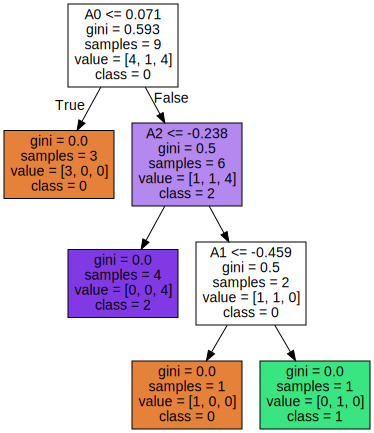

In [64]:
# Display Decision Tree͏︆͏󠄃͏󠄌͏󠄍͏︅͏︀͏︋͏︋͏󠄄͏︁͏︀
display(SVG(graph.pipe(format='svg')))